Dataset 1


,Bill,Tip,Credit,Guests,Day,Server,PctTip
0,23.70,10.00,n,2,f,A,42.2
1,36.11,7.00,n,3,f,B,19.4
2,31.99,5.01,y,2,f,A,15.7
3,17.39,3.61,y,2,f,B,20.8
4,15.41,3.00,n,2,f,B,19.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bill    157 non-null    float64
 1   Tip     157 non-null    float64
 2   Credit  157 non-null    object 
 3   Guests  157 non-null    int64  
 4   Day     157 non-null    object 
 5   Server  157 non-null    object 
 6   PctTip  157 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.7+ KB


None


 Dataset 2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None


 
 
 Edited version of datasets 

Dataset 1
Days Recorded: 
 Wed     62
Thur    36
Fri     26
Mon     20
Tue     13
Name: Day, dtype: int64


,Bill,Tip,Day,Guests,PctTip,PctTips_Guest
156,17.12,2.5,Mon,2,14.6,7.3
137,6.69,1.0,Mon,1,14.9,14.9
134,16.48,3.0,Mon,2,18.2,9.1
155,51.68,10.0,Mon,6,19.3,3.2
106,18.83,2.8,Mon,2,14.9,7.4


Day
Mon     15.935000
Tue     18.023077
Wed     16.551613
Thur    16.869444
Fri     16.257692
Name: PctTip, dtype: float64


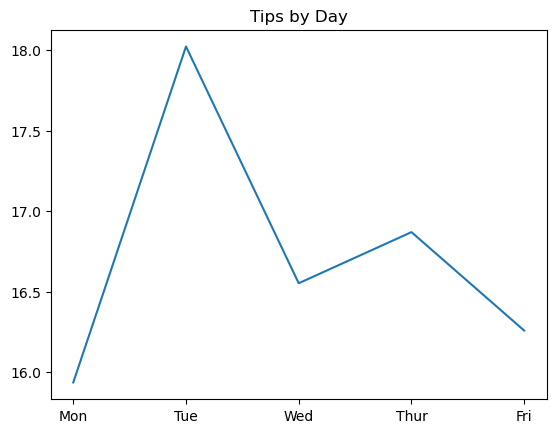

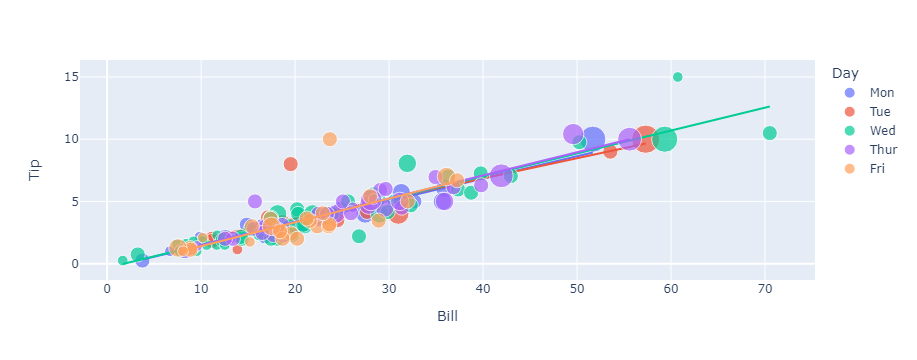

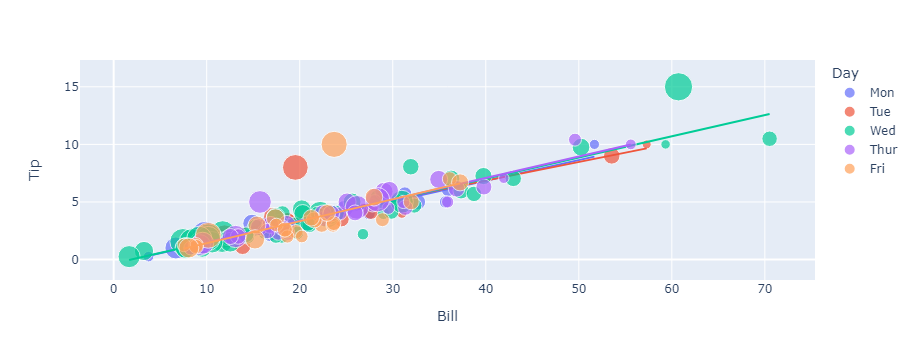

The average percentage tips per person is: 9.22484076433121
count    157.000000
mean       9.224841
std        4.413378
min        2.500000
25%        6.400000
50%        8.000000
75%       10.200000
max       24.700000
Name: PctTips_Guest, dtype: float64

 
 Dataset 2
Days Recorded : 
 Sat     87
Sun     76
Thur    62
Fri     19
Name: Day, dtype: int64


,Bill,Tip,Day,Guests,PctTip,PctTips_Guest
121,13.42,1.68,Thur,2,12.5,6.2
133,12.26,2.00,Thur,2,16.3,8.2
132,11.17,1.50,Thur,2,13.4,6.7
131,20.27,2.83,Thur,2,14.0,7.0
130,19.08,1.50,Thur,2,7.9,4.0


Day
Thur    16.127419
Fri     17.000000
Sat     15.314943
Sun     16.692105
Name: PctTip, dtype: float64


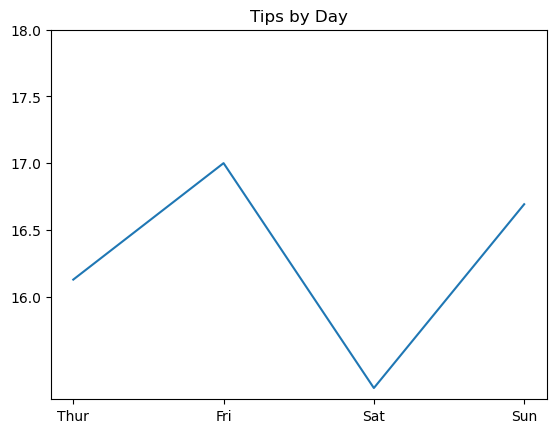

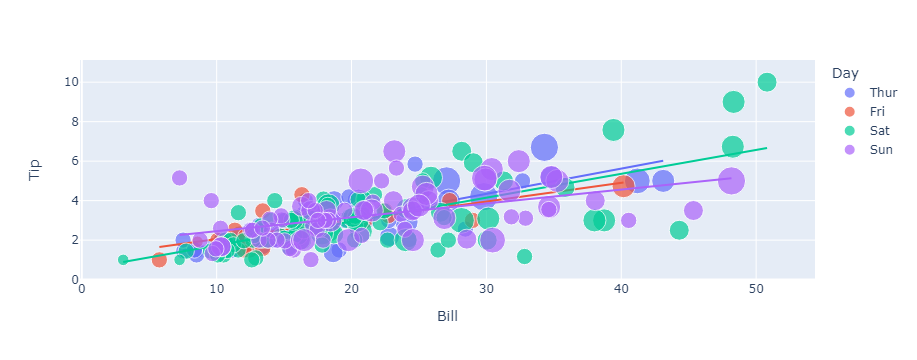

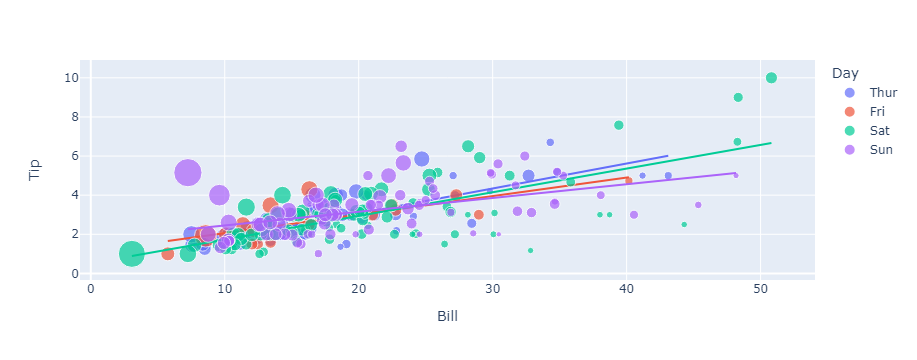

The average percentage tips per person is: 7.097540983606552
count    244.000000
mean       7.097541
std        4.008334
min        1.300000
25%        4.600000
50%        6.850000
75%        8.800000
max       35.500000
Name: PctTips_Guest, dtype: float64

 
 
 ////////////////////////////////// Machine Learning Section ////////////////////////////////// 
 
 

Testing first dataset
Mean Squared Error: 0.4384057604414206
Mean Absolute Error: 0.4391886177014744
R-squared: 0.9127245950195849


,actual,predictions
0,5.00,2.569937
1,7.04,7.647447
2,7.00,6.298159
3,3.44,3.637805
4,4.00,3.822806



 
 Testing second dataset
Mean Squared Error: 1.3549340013156126
Mean Absolute Error: 0.8539096188096914
R-squared: 0.40063621631351864


,actual,predictions
0,1.83,1.680328
1,2.00,2.029344
2,3.39,2.082152
3,4.34,3.815345
4,5.00,3.053451



 
 
 ////////////////////////////////// Combined Dataset Machine Learning Section ////////////////////////////////// 
 
 

Testing combined dataset
Mean Squared Error: 0.8649821580196282
Mean Absolute Error: 0.6762051161524949
R-squared: 0.7176904417466412

 
 
 ////////////////////////////////// Train one Dataset and Test Other Dataset Machine Learning Section ////////////////////////////////// 
 
 

Testing Second dataset with first dataset
Mean Squared Error: 1.5770666316175572
Mean Absolute Error: 0.8707981159003166
R-squared: 0.302374416367005

 
 Testing First dataset with Second dataset
Mean Squared Error: 1.5470594318700193
Mean Absolute Error: 0.900609053402327
R-squared: 0.6920199262225065


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def import_dataset(file):
    df = pd.read_csv(file) 
    return df


#### Clean Section

# Columns to keep: Total Bill, Tip, Guests, Day
# Columns to remove: Credit, Server, Sex, Smoker, Time
# Columns to add: PctTip
def df1_edit(df):
    df = df.drop(columns=['Credit','Server'])  
    new_cols = ["Bill","Tip", "Day", "Guests", "PctTip"]
    df = df.reindex(columns=new_cols)
    
    df['Day'] = df['Day'].replace({'f': 'Fri', 'm': 'Mon', 't':'Tue', 'w':'Wed', 'th':"Thur"}) 
    days = ["Mon", 'Tue', 'Wed', 'Thur', 'Fri']
    
    df['Day'] = pd.Categorical(df['Day'], categories=days, ordered=True)
    df = df.sort_values(by = 'Day')
    
    df["PctTips_Guest"] = df["PctTip"] / df["Guests"]
    df['PctTips_Guest'] = df['PctTips_Guest'].round(1)
    return df

def df2_edit(df):
    df = df.rename(columns={'total_bill': 'Bill', 'tip': 'Tip', 'day': 'Day', 'size': "Guests"})
    df = df.drop(columns=['sex','smoker', 'time'])
    df['PctTip'] = (df['Tip'] / df['Bill'])*100
    df['PctTip'] = df['PctTip'].round(1)
    
    days = ['Thur', 'Fri', 'Sat', 'Sun']
    
    df['Day'] = pd.Categorical(df['Day'], categories=days, ordered=True)
    df = df.sort_values(by = 'Day')
    
    df["PctTips_Guest"] = df["PctTip"] / df["Guests"] 
    df['PctTips_Guest'] = df['PctTips_Guest'].round(1)
    return df

 
    
    
#### Analysis Section

def group(df):
    avg_tip_day = df.groupby("Day")["PctTip"].mean()
    return avg_tip_day

    
def plot(avg_tip_day):
    plt.plot(avg_tip_day)
    plt.yticks([16.0,16.5,17,17.5,18])
    plt.title("Tips by Day")
    plt.show()
    

def graphs(df):
    figure = px.scatter(data_frame = df, x="Bill", y="Tip", size="Guests", color= "Day", trendline="ols")
    figure.show()
    
    figure = px.scatter(data_frame = df, x="Bill", y="Tip", size="PctTips_Guest", color= "Day", trendline="ols")
    figure.show()

def stats(df):
    print("The average percentage tips per person is:",df["PctTips_Guest"].mean())
    stats = df["PctTips_Guest"].describe()
    print(stats)
    
    
    
    
###### Machine Learning Section
    
def df1_prepare_ML(df): 
    df["Day"] = df["Day"].map({"Mon": 1, "Tue": 2, "Wed": 3, "Thur": 4, "Fri": 5})

    
def df2_prepare_ML(df):  
    df["Day"] = df["Day"].map({"Thur": 4, "Fri": 5, "Sat": 6, "Sun": 7})


def split_data(df):
    x = np.array(df[["Bill", "Day", "Guests"]])
    y = np.array(df["Tip"])

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
    return xtrain, xtest, ytrain, ytest
    
    
def train_model(xtrain, ytrain):
    model = LinearRegression()
    model.fit(xtrain, ytrain)
    return model


def test_model(model, xtest, ytest):
    predictions = model.predict(xtest)

    mse = mean_squared_error(ytest, predictions)
    mae = mean_absolute_error(ytest, predictions)
    r_squared = r2_score(ytest, predictions)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r_squared)
    
    return predictions
    
    

############ Combine both datasets then use machine learning to predict tips

def combine_df(df1, df2):
    combined_df = pd.concat([df1, df2], ignore_index=True)
    return combined_df
    
def combined_split_data(combined_df):
    x = np.array(df[["Bill", "Day", "Guests"]])
    y = np.array(df["Tip"])

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
    return xtrain, xtest, ytrain, ytest
    
    
def combined_train_model(xtrain, ytrain):
    model = LinearRegression()
    model.fit(xtrain, ytrain)
    return model


def combined_test_model(model, xtest, ytest):
    predictions = model.predict(xtest)
    
    mse = mean_squared_error(ytest, predictions)
    mae = mean_absolute_error(ytest, predictions)
    r_squared = r2_score(ytest, predictions)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r_squared)
    
    

# Compare Predictions with actual value

def compare_result(predictions, ytest):
    compare_result = pd.concat([pd.Series(ytest), pd.Series(predictions)], axis=1)
    compare_result.columns = ["actual", "predictions"]
    display(compare_result.head())
    
    
    
    
    
def main():
    #First dataset
    file1 = "RestaurantTips.csv"
    df1 = import_dataset(file1)
    print("Dataset 1")
    display(df1.head())
    display(df1.info())
    
    # Second dataset
    file2 = "tips.csv"
    print("\n","Dataset 2")
    df2 = import_dataset(file2)
    display(df2.head())
    display(df2.info())
    
    print("\n","\n","\n","Edited version of datasets","\n")
    
    print("Dataset 1")
    df1 = df1_edit(df1)
    print('Days Recorded:', '\n', df1['Day'].value_counts())
    display(df1.head())
    df1_avg_tip_day = group(df1)
    print(df1_avg_tip_day)
    plot(df1_avg_tip_day)
    graphs(df1)
    stats(df1)
    
    print('\n', '\n',"Dataset 2")
    df2 = df2_edit(df2)
    print('Days Recorded :', '\n', df2['Day'].value_counts())
    display(df2.head())
    df2_avg_tip_day = group(df2)
    print(df2_avg_tip_day)
    plot(df2_avg_tip_day)
    graphs(df2)
    stats(df2)
    
    
    print("\n","\n","\n","////////////////////////////////// Machine Learning Section //////////////////////////////////","\n","\n","\n")
    
    df1_prepare_ML(df1)
    df1_xtrain, df1_xtest, df1_ytrain, df1_ytest = split_data(df1)
    df1_model = train_model(df1_xtrain, df1_ytrain)
    print("Testing first dataset")
    df1_predictions = test_model(df1_model, df1_xtest, df1_ytest)
    compare_result(df1_predictions, df1_ytest)
    
    df2_prepare_ML(df2)
    df2_xtrain, df2_xtest, df2_ytrain, df2_ytest = split_data(df2)
    df2_model = train_model(df2_xtrain, df2_ytrain)
    print("\n","\n","Testing second dataset")
    df2_predictions = test_model(df2_model, df2_xtest, df2_ytest)
    compare_result(df2_predictions, df2_ytest)
    
    
    print("\n","\n","\n","////////////////////////////////// Combined Dataset Machine Learning Section //////////////////////////////////","\n","\n","\n")

    combined_df = combine_df(df1,df2)
    combined_xtrain, combined_xtest, combined_ytrain, combined_ytest = split_data(combined_df)
    combined_model = train_model(combined_xtrain, combined_ytrain)
    print("Testing combined dataset")
    test_model(combined_model, combined_xtest, combined_ytest)
    
    
    print("\n","\n","\n","////////////////////////////////// Train one Dataset and Test Other Dataset Machine Learning Section //////////////////////////////////","\n","\n","\n")
    
    print("Testing Second dataset with first dataset")
    test_model(df1_model, df2_xtest, df2_ytest)
    
    print("\n","\n","Testing First dataset with Second dataset")
    test_model(df2_model, df1_xtest, df1_ytest)
    
    
main()